# OLSの検定・区間推定

## OLS推定量の標準誤差

ある推定量の**漸近分布**（asymptotic distribution、大標本において推定量が近似的に従う分布）の標準偏差を**標準誤差**（standard error）という。

重回帰モデル

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_d x_d + \varepsilon
$$

において、各$k=0, 1, \dots, d$について、回帰係数$\beta_k$のOLS推定量$\hat{\beta}_k$は、中心極限定理により十分大きな$n$のもとで

$$
Z = \frac
{ \sqrt{n} ( \hat{\beta}_k - \beta_k  ) }
{ \sqrt{s} }
$$

が近似的に標準正規分布$N(0, 1)$に従う。

ここで$s$は標本分散に相当する（TODO: これ追記する）。

上記の式は書き換えると

$$
\hat{\beta}_k =
\beta_k + \frac{ \sqrt{s} }{ \sqrt{n} } \cdot Z
$$

となる。ここで

$$
\sigma = \frac{ \sqrt{s} }{ \sqrt{n} }
$$

とおけば、$\hat{\beta}_k$は平均$\beta_k$、分散$\sigma^2$の正規分布$N(\beta_k, \sigma^2)$に従うということになる。



### データによる例

例えば次のように生成されたデータがあるとする。

$$
\begin{align}
y &= 10 + 5x + e\\
x &\sim \text{Uniform}(0, 1)\\
e &\sim N(0, 1)
\end{align}
$$

<AxesSubplot: xlabel='x', ylabel='y'>

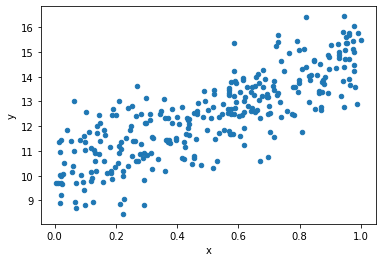

In [14]:
import numpy as np
import pandas as pd

n = 300
beta = [10, 5]
np.random.seed(0)
x = np.random.uniform(size=n)
y = beta[0] + x * beta[1] + np.random.normal(size=n)
df = pd.DataFrame({"x": x, "y": y})
df.plot.scatter(x="x", y="y")

In [15]:
df.describe()

,x,y
count,300.000000,300.000000
mean,0.503503,12.412351
std,0.290474,1.690354
min,0.004695,8.456236
25%,0.247671,11.283655
50%,0.522548,12.494137
75%,0.730305,13.578144
max,0.998847,16.441451


単回帰モデルなので

$$
\hat{\beta}_1 = \frac{
    \sum^n_{i=1} (x_i - \bar{x}) (y_i - \bar{y})
}{
    \sum^n_{i=1} (x_i - \bar{x})^2
}
$$

と計算できる

In [30]:
beta1 = sum((x - x.mean()) * (y - y.mean())) / sum((x - x.mean())**2)
beta1

4.710096736459251

$$
Z = \frac
{ \sqrt{n} ( \hat{\beta}_k - \beta_k  ) }
{ \sqrt{s} }
$$

In [8]:
import numpy as np
import pandas as pd

n = 300
beta = [10, 5]
np.random.seed(0)
x = np.random.uniform(size=n)
df = pd.DataFrame({
    "x": x,
    "y": beta[0] + x * beta[1] + np.random.normal(size=n)
})
# df.plot.scatter(x="x", y="y")

import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

models = [
    smf.ols('y ~ x', data=df).fit(),
]
Stargazer(models)

## OLS推定量の$t$検定

帰無仮説と対立仮説をそれぞれ

$$
H_0: \beta_k = 0\\
H_1: \beta_k \neq 0\\
$$

とする。$t$統計量を

$$
t = \frac{\hat{\beta}_k}{\sigma}
= \frac{ \sqrt{n} }{ \sqrt{s} } \hat{\beta}_k
$$

と定義すると、これは標準正規分布$N(0,1)$に従う。$|t|>1.96$となればその確率は5%以下であるため有意水準5%で帰無仮説を棄却できる。


### $t$検定の$p$値

帰無仮説$H_0: \beta_k = 0$を棄却するためには有意水準をどこまで引き上げなければいけないかを考える。

$N(0, 1)$に従う$Z$を用いて、$P(|Z|>|t|)$を計算する


## 回帰の標準誤差

回帰の標準誤差（standard error of the regression: SER）は、回帰誤差$\varepsilon$の標準偏差の推定量

$$
SER = s_{\hat{u}}, \
s_{\hat{u}} = \frac{1}{n-d-1} \sum^n_{i=1} \hat{u}^2_i
$$

（$\hat{u}$の平均はゼロであるため、通常の分散の式における平均で引くような項が存在していない）

ここで$d$は推定している傾きのパラメータ数（定数項も含めれば$d+1$）。下方バイアスが生じることがわかっているので自由度のぶんだけ修正する。
